# Import dataset

In [213]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [214]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Missing Values

In [216]:
#Check for missing values
mis_col = df.isna().sum()[df.isna().sum()>0]
mis_col

children         4
city           488
agent        16340
company     112593
dtype: int64

In [217]:
#Check missing columns data
for i in mis_col.index:
    print(f'Unique values in {i} column :',df[i].unique()[:4])

Unique values in children column : [ 0.  1.  2. 10.]
Unique values in city column : ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu']
Unique values in agent column : [ nan 304. 240. 303.]
Unique values in company column : [ nan 110. 113. 270.]


In [218]:
#Fill missing values
df[['children','agent','company']]= df[['children','agent','company']].fillna(0)
df['city'] = df['city'].fillna('unknown')

In [219]:
#Check missing values
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

## Adjusting values

In [220]:
#check for categorical values
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [221]:
#Correcting meal column values
def fx(x):
    if x == 'Undefined':
        return 'No Meal'
    else :
        return x
df['meal'] = df['meal'].map(lambda x: fx(x))
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [222]:
#Encoding Month values
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
month_dict = {}

a = 1
for i in months_list:
    month_dict[i] = a
    a +=1
    
df['arrival_date_month'] = df['arrival_date_month'].map(month_dict)
df['arrival_date_month'].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [223]:
#Convert data type to integer
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

## Drop Unnecesary Data

In [224]:
#Create new column total_guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

#filter data where total guest and stay night more than 0, 
#total_guests and stay night 0 means no one use the room and not spending night in the room
df = df[(df['total_guests']>0) & (df['stay_nights']>0)]
df.shape

(118565, 31)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [225]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_nights
2,Resort Hotel,0,7,2017,9,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,9,27,1,0,2,2,...,0,0,0,Personal,107.0,0,0,Check-Out,2,2


In [226]:
dfg = df.groupby(['hotel','arrival_date_year','arrival_date_month'])[['is_canceled']].count()
dfg = dfg.reset_index()
dfg =dfg.rename(columns={'arrival_date_year':'year','arrival_date_month':'month','is_canceled':'order'})
dfg.head()

,hotel,year,month,order
0,City Hotel,2017,1,1225
1,City Hotel,2017,2,1637
2,City Hotel,2017,9,1393
3,City Hotel,2017,10,2471
4,City Hotel,2017,11,3516


In [227]:
dfg_mon_order = dfg.groupby(['hotel','month'])[['order']].mean().reset_index()
dfg_mon_order.head()

,hotel,month,order
0,City Hotel,1,2154.5
1,City Hotel,2,2048.5
2,City Hotel,3,1856.0
3,City Hotel,4,2458.5
4,City Hotel,5,3205.5


In [228]:
#External data hari libur 2017 - 2019
libur = pd.read_csv('libur.csv')
libur = libur.fillna(0)
libur = libur.groupby('bulan')[['libur']].mean().reset_index()


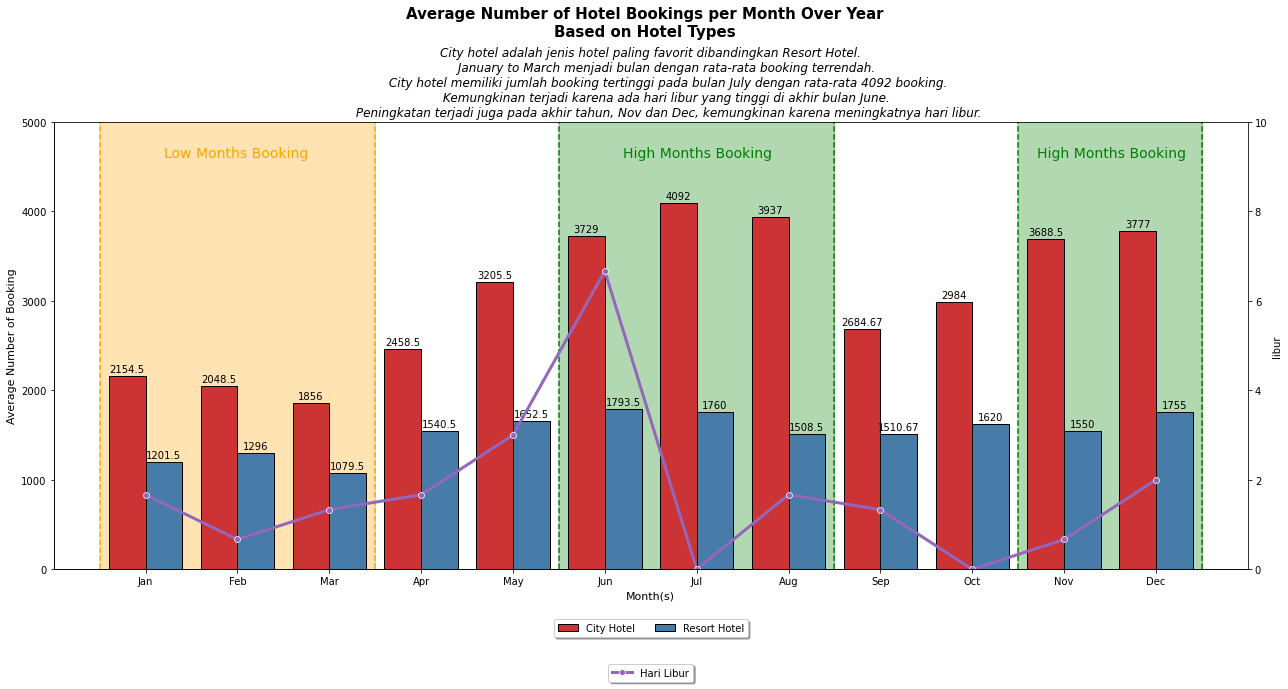

In [229]:
fig, ax = plt.subplots(figsize=(18,10))
plt.suptitle("Average Number of Hotel Bookings per Month Over Year\nBased on Hotel Types", fontsize=15, color='black', weight='bold')
plt.title( fontsize=12, fontstyle='italic', 
         label="""City hotel adalah jenis hotel paling favorit dibandingkan Resort Hotel.
         January to March menjadi bulan dengan rata-rata booking terrendah. 
         City hotel memiliki jumlah booking tertinggi pada bulan July dengan rata-rata 4092 booking.
         Kemungkinan terjadi karena ada hari libur yang tinggi di akhir bulan June. 
         Peningkatan terjadi juga pada akhir tahun, Nov dan Dec, kemungkinan karena meningkatnya hari libur.""")
sns.barplot(data=dfg_mon_order,x='month',y='order',hue='hotel',edgecolor='black', palette='Set1',ax=ax)


plt.xlabel('Month(s)', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)
plt.xlim(-1, 12)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(2.5, ls='--', color='orange')
plt.axvline(-0.5, ls='--', color='orange')
plt.stackplot(np.arange(-0.5,3.5), [[5000]], color='orange', alpha=0.3)
plt.text(x=0.2, y=4650, s='Low Months Booking', fontsize=14, color='orange', va='center')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='green', alpha=0.3)
plt.axvline(11.5, ls='--', color='green')
plt.axvline(9.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), [[5000]], color='green', alpha=0.3)
plt.text(x=5.2, y=4650, s='High Months Booking', fontsize=14, color='green', va='center')
plt.text(x=9.7, y=4650, s='High Months Booking', fontsize=14, color='green', va='center')

sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

ax1 = ax.twinx()
sns.lineplot(data=libur,x=libur.index,y='libur',color='C4',label='Hari Libur',marker='o',linewidth=3)
plt.ylim(0,10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()

plt.savefig('months_booking_summary.jpg', dpi=400)
plt.show()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

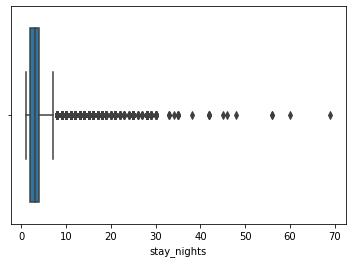

In [230]:
#Check distribution
sns.boxplot(data=df, x='stay_nights')
plt.show()

In [231]:
df['stay_weeks'] = df['stay_nights'].map(lambda x: '1 weeks' if x <= 7 else '2 weeks' if x<=14 else '3 weeks' if x<=21 else '4 weeks' if x<=28 else '5 weeks or more')

In [232]:
dfw = df.groupby(['hotel','stay_weeks','is_canceled'])[['adults']].count().reset_index()
dfw = dfw.rename(columns={'adults':'counts'})
dfw.head()

,hotel,stay_weeks,is_canceled,counts
0,City Hotel,1 weeks,0,45287
1,City Hotel,1 weeks,1,32391
2,City Hotel,2 weeks,0,511
3,City Hotel,2 weeks,1,558
4,City Hotel,3 weeks,0,29


In [233]:
dfw_sum = dfw.groupby(['hotel','stay_weeks'])[['counts']].sum().reset_index()
dfw = dfw.merge(dfw_sum,how='left',on=['hotel','stay_weeks'],suffixes=('','_sum'))

In [234]:
dfw['percent'] = round((dfw['counts']/dfw['counts_sum'])*100,2)

dfw_p = dfw[dfw['is_canceled']==1].sort_values(by='stay_weeks')
dfw_p.head()

,hotel,stay_weeks,is_canceled,counts,counts_sum,percent
1,City Hotel,1 weeks,1,32391,77678,41.70
11,Resort Hotel,1 weeks,1,9907,35661,27.78
3,City Hotel,2 weeks,1,558,1069,52.20
13,Resort Hotel,2 weeks,1,1078,3728,28.92
5,City Hotel,3 weeks,1,76,105,72.38


In [235]:
#Label for anntotation
ch_label = [str(i)+' %' for i in dfw_p[dfw_p['hotel']=='City Hotel']['percent']]
rh_label = [str(i)+' %' for i in dfw_p[dfw_p['hotel']=='Resort Hotel']['percent']]
ch = [i for i in dfw_p[dfw_p['hotel']=='City Hotel']['counts']]
rh = [i for i in dfw_p[dfw_p['hotel']=='Resort Hotel']['counts']]

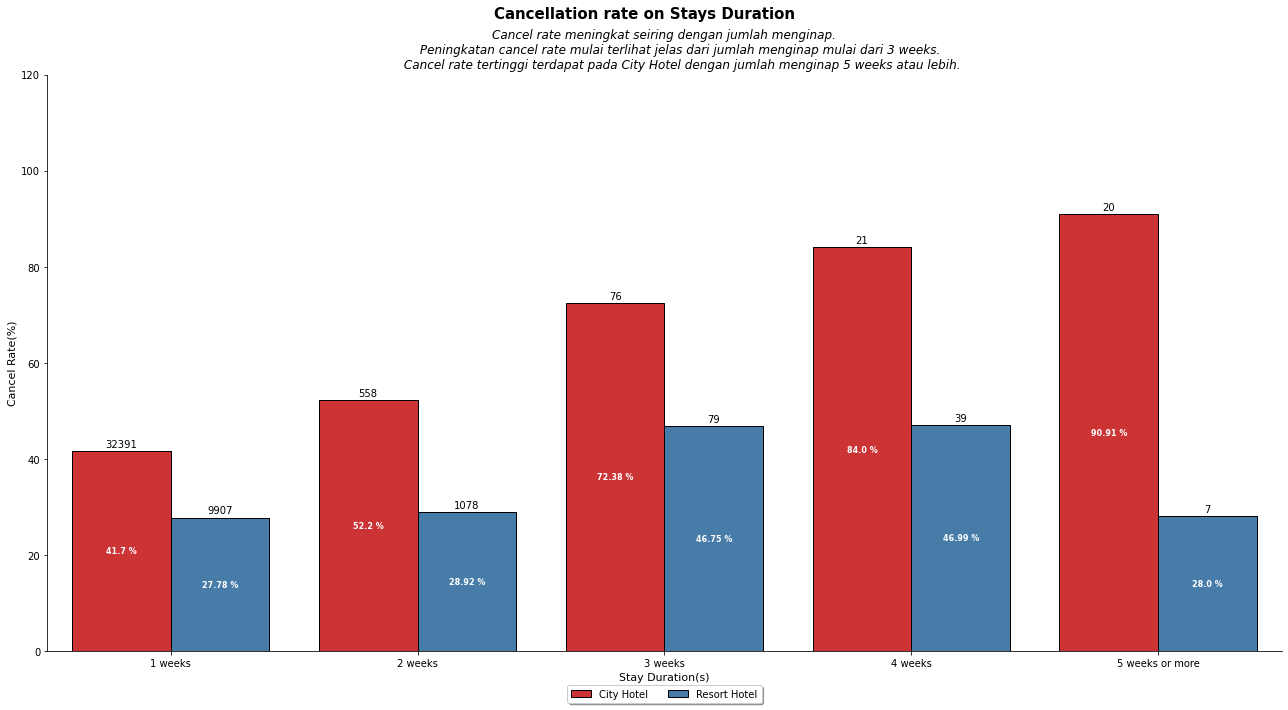

In [236]:
fig, ax = plt.subplots(figsize=(18,10))
plt.suptitle("Cancellation rate on Stays Duration", fontsize=15, color='black', weight='bold')
plt.title( fontsize=12, fontstyle='italic', 
         label="""Cancel rate meningkat seiring dengan jumlah menginap.
         Peningkatan cancel rate mulai terlihat jelas dari jumlah menginap mulai dari 3 weeks. 
         Cancel rate tertinggi terdapat pada City Hotel dengan jumlah menginap 5 weeks atau lebih.""")

sns.barplot(data=dfw_p, x='stay_weeks',y='percent',hue='hotel',edgecolor='black', palette='Set1',ax=ax)
plt.ylim(0,120)
plt.bar_label(ax.containers[0],ch_label ,label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], rh_label ,label_type='center', color='white', weight='bold', fontsize=8)

plt.bar_label(ax.containers[0], ch,padding=2)
plt.bar_label(ax.containers[1], rh,padding=2)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancel Rate(%)', fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
sns.despine()
plt.tight_layout()
plt.savefig('cancel_rate.jpg', dpi=400)
plt.show()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [237]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_nights,stay_weeks
2,Resort Hotel,0,7,2017,9,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,1 weeks
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,1 weeks
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,1 weeks
5,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,1 weeks
6,Resort Hotel,0,0,2017,9,27,1,0,2,2,...,0,0,Personal,107.0,0,0,Check-Out,2,2,1 weeks


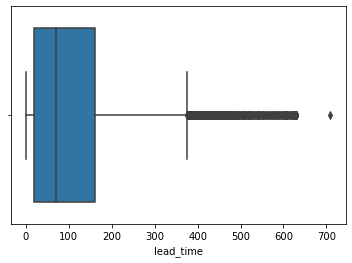

In [238]:
#Check distribution
sns.boxplot(data=df, x='lead_time')
plt.show()

In [239]:
df['lead_time'].describe()

count    118565.000000
mean        104.505832
std         106.915519
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

In [241]:
def lead(x):
    if x == 0:
        return 'D-day'
    elif x <= 7:
        return '<= 1 Week'
    elif x <= 30:
        return '<= 1 Month'
    elif x <= 120:
        return '<= 4 Months'
    elif x <= 365:
        return '<= 1 Year'
    else :
        return '> 1 Year'
    
df['cat_lead_time'] = df['lead_time'].map(lambda x: lead(x))

In [242]:
dft = df.groupby(['hotel','cat_lead_time','is_canceled'])[['lead_time']].count().reset_index()
dft = dft.rename(columns={'lead_time':'count'})

In [243]:
dft_sum = dft.groupby(['hotel','cat_lead_time'])[['count']].sum().reset_index()
dft_sum = dft_sum.rename(columns={'count':'count_sum'})

In [244]:
dft = dft.merge(dft_sum, how='left',on=['hotel','cat_lead_time'])
dft['percent'] = round((dft['count']/dft['count_sum'])*100,2)
dft.head()

,hotel,cat_lead_time,is_canceled,count,count_sum,percent
0,City Hotel,<= 1 Month,0,8633,12511,69.00
1,City Hotel,<= 1 Month,1,3878,12511,31.00
2,City Hotel,<= 1 Week,0,6593,7630,86.41
3,City Hotel,<= 1 Week,1,1037,7630,13.59
4,City Hotel,<= 1 Year,0,10798,24985,43.22


In [245]:
dft_1 = dft[dft['is_canceled']==1]
dft_1['cat_lead_time'] = pd.Categorical(dft_1['cat_lead_time'],['D-day','<= 1 Week','<= 1 Month','<= 4 Months','<= 1 Year','> 1 Year'])
dft_1 = dft_1.sort_values(by='cat_lead_time')
dft_1

,hotel,cat_lead_time,is_canceled,count,count_sum,percent
11,City Hotel,D-day,1,259,2881,8.99
23,Resort Hotel,D-day,1,153,3126,4.89
3,City Hotel,<= 1 Week,1,1037,7630,13.59
15,Resort Hotel,<= 1 Week,1,424,5609,7.56
1,City Hotel,<= 1 Month,1,3878,12511,31.00
13,Resort Hotel,<= 1 Month,1,1399,6337,22.08
7,City Hotel,<= 4 Months,1,11783,28189,41.80
19,Resort Hotel,<= 4 Months,1,3999,11662,34.29
5,City Hotel,<= 1 Year,1,14187,24985,56.78
17,Resort Hotel,<= 1 Year,1,4928,12491,39.45


In [246]:
#Label for annotation
ch_percent = [str(i)+' %' for i in dft_1[dft_1['hotel']=='City Hotel']['percent']]
rh_percent = [str(i)+' %' for i in dft_1[dft_1['hotel']=='Resort Hotel']['percent']]
ch_count = [i for i in dft_1[dft_1['hotel']=='City Hotel']['count']]
rh_count = [i for i in dft_1[dft_1['hotel']=='Resort Hotel']['count']]

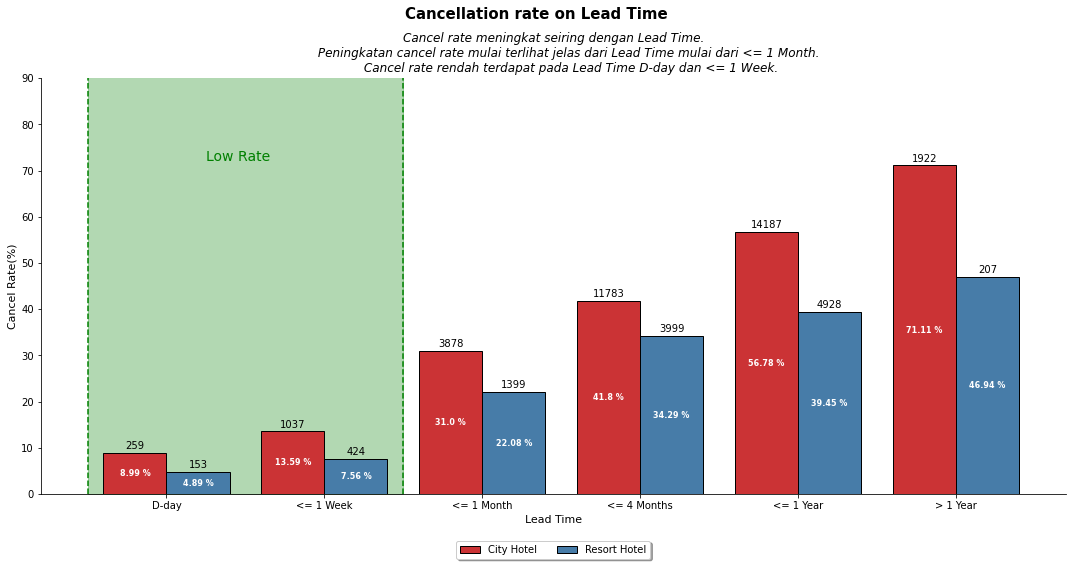

In [247]:
fig, ax = plt.subplots(figsize=(15,8))
plt.suptitle("Cancellation rate on Lead Time", fontsize=15, color='black', weight='bold')
plt.title( fontsize=12, fontstyle='italic', 
         label="""Cancel rate meningkat seiring dengan Lead Time.
         Peningkatan cancel rate mulai terlihat jelas dari Lead Time mulai dari <= 1 Month. 
         Cancel rate rendah terdapat pada Lead Time D-day dan <= 1 Week.""")

sns.barplot(data=dft_1, x='cat_lead_time',y='percent',hue='hotel',edgecolor='black', palette='Set1',ax=ax,order=['D-day','<= 1 Week','<= 1 Month','<= 4 Months','<= 1 Year','> 1 Year'])

plt.ylim(0,90)
plt.bar_label(ax.containers[0],ch_percent ,label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1],rh_percent ,label_type='center', color='white', weight='bold', fontsize=8)

plt.bar_label(ax.containers[0], ch_count,padding=2)
plt.bar_label(ax.containers[1], rh_count,padding=2)

plt.axvline(1.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,2.5), [[100]], color='green', alpha=0.3)
plt.text(x=0.25, y=73, s='Low Rate', fontsize=14, color='green', va='center')

plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancel Rate(%)', fontsize=11)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
sns.despine()
plt.tight_layout()
plt.savefig('cancel_rate_lead_time.jpg', dpi=400)
plt.show()